In [2]:
import matplotlib.pyplot as plt
from cycler import cycler

# Datas 

# 1
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
vendas = [85, 90, 78, 92, 88, 96, 94, 98, 100, 102, 105, 108]

# 2
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
vendas = [85, 90, 78, 92, 88, 96, 94, 98, 100, 102, 105, 108]

# 3
produtos = ['Produto A', 'Produto B', 'Produto C', 'Produto D', 'Produto E']
quantidades = [23, 45, 17, 30, 37]

# 4
categorias = ['Eletrônicos', 'Roupas', 'Alimentos', 'Livros']
quantidades = [45, 30, 15, 10]
destaque = [0.1, 0, 0, 0]  # destacar a primeira fatia

# 5
anos = [2018, 2019, 2020, 2021]
vendas_online = [5, 10, 15, 20]
vendas_loja = [10, 8, 6, 4]

# cores
cores = plt.get_cmap('Set2').colors
ciclo_cores = cycler('color', cores)
plt.rc('axes', prop_cycle=ciclo_cores)



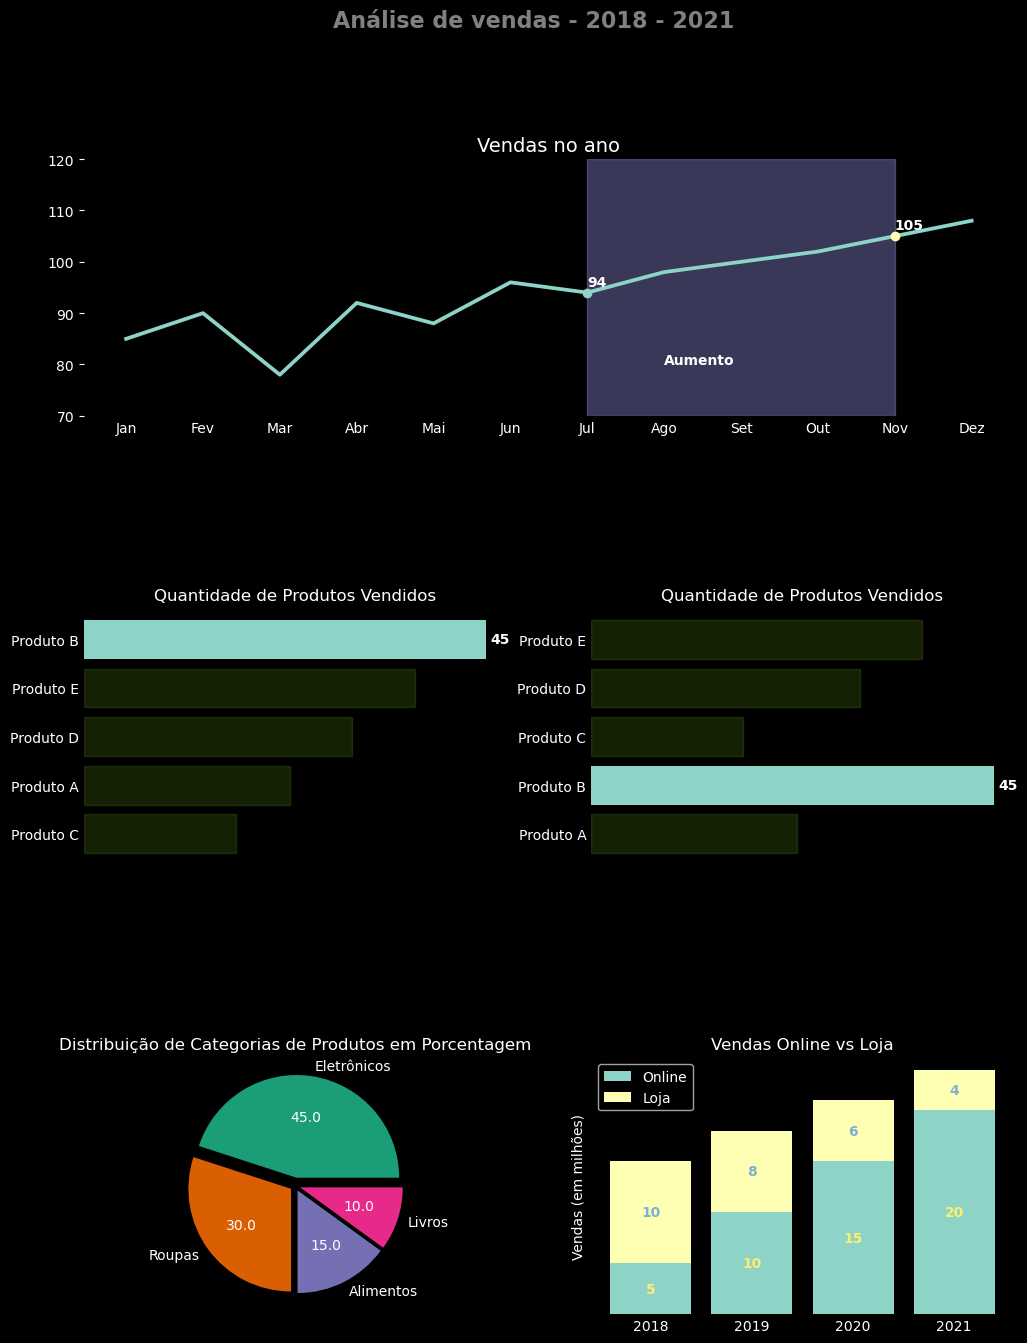

<Figure size 1400x600 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt
from cycler import cycler

plt.style.use('dark_background')
# -------------------------------------------------
mosaico = 'AA;BC;DE'
fig = plt.figure(figsize=(12, 15))
espacamento = {'wspace': .2, 'hspace':.75}
axs = fig.subplot_mosaic(mosaico, gridspec_kw=espacamento)


#cores = plt.get_cmap('Dark2').colors
#ciclo_cores = cycler('color', cores)
#plt.rc('axes', prop_cycle=ciclo_cores)

#plt.style.use('fivethirtyeigth')

# 1 -------------------------------------------------
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
vendas = [85, 90, 78, 92, 88, 96, 94, 98, 100, 102, 105, 108]


axs['A'].plot(meses, vendas, linewidth=2.7)
axs['A'].tick_params(axis='y', )

axs['A'].set_ylim(70, 120)

plt.figure(figsize=(14,6))

# Cor anotações



# Scatter
for posicao in (6, 10):
    axs['A'].scatter(meses[posicao], vendas[posicao], zorder=2)
    axs['A'].annotate(vendas[posicao], xy=(meses[posicao], vendas[posicao]), xytext=(0, 5), textcoords='offset points', weight='bold')


# X
axs['A'].set_xticks(meses)
axs['A'].axvspan(6, 10, alpha=0.5, color=cores[2], zorder=0)


axs['A'].tick_params(axis='x', length=0)
axs['A'].text(7, 80, 'Aumento', fontsize=10, weight='bold')
axs['A'].set_frame_on(False)

axs['A'].set_title('Vendas no ano', fontsize=14)


# 2 . 1 -------------------------------------------------
produtos = ['Produto A', 'Produto B', 'Produto C', 'Produto D', 'Produto E']
quantidades = [23, 45, 17, 30, 37]
dados_ordenados = sorted(zip(quantidades, produtos))  # por quantidade
quantidades_ordenadas = [x[0] for x in dados_ordenados]
produtos_ordenados = [x[1] for x in dados_ordenados]


barras = axs['B'].barh(produtos_ordenados, quantidades_ordenadas)

axs['B'].bar_label(barras, labels=[max(quantidades_ordenadas) if x == max(quantidades_ordenadas) else '' for x in quantidades_ordenadas], padding=3, fontsize=10, fontweight='bold')

# retirando as bordas do gráfico
# plt.box(False)

# retirando o eixo x
axs['B'].set_xticks([])
axs['B'].tick_params(axis='y', length=0)

# destacando a barra do produto com maior quantidade vendida
for i, barra in enumerate(barras):
    if i != quantidades_ordenadas.index(max(quantidades_ordenadas)):
        barras[i].set_color(cores[4])
        barras[i].set_alpha(0.2)

axs['B'].set_frame_on(False)

axs['B'].set_title('Quantidade de Produtos Vendidos')



# 2 . 2 -------------------------------------------------
barras = axs['C'].barh(produtos, quantidades)

axs['C'].bar_label(barras, labels=[max(quantidades) if x == max(quantidades) else '' for x in quantidades], padding=3, fontsize=10, fontweight='bold')

# retirando as bordas do gráfico
# plt.box(False)

# retirando o eixo x
axs['C'].set_xticks([])
axs['C'].tick_params(axis='y', length=0)

axs['C'].set_frame_on(False)

# destacando a barra do produto com maior quantidade vendida
for i, barra in enumerate(barras):
    if i != quantidades.index(max(quantidades)):
        barras[i].set_color(cores[4])
        barras[i].set_alpha(0.2)


axs['C'].set_title('Quantidade de Produtos Vendidos')


# 3 . 1 -------------------------------------------------
categorias = ['Eletrônicos', 'Roupas', 'Alimentos', 'Livros']
quantidades = [45, 30, 15, 10]
destaque = [0.08, 0.05, 0.05, 0.05]  # destacar a primeira fatia


axs['D'].pie(quantidades, labels=categorias, colors=cores, autopct='%.1f', explode=destaque)
axs['D'].set_title('Distribuição de Categorias de Produtos em Porcentagem')



# 3 . 2 -------------------------------------------------
anos = [2018, 2019, 2020, 2021]
vendas_online = [5, 10, 15, 20]
vendas_loja = [10, 8, 6, 4]


barra_online = axs['E'].bar(anos, vendas_online, label='Online')
barra_loja = axs['E'].bar(anos, vendas_loja, bottom=vendas_online, label='Loja')
axs['E'].bar_label(barra_online, labels=vendas_online, fontsize=10, fontweight='bold', label_type='center', color='C9')
axs['E'].bar_label(barra_loja, labels=vendas_loja, fontsize=10, fontweight='bold', label_type='center', color='C4')

# forçar os anos a serem exibidos como inteiros
axs['E'].set_xticks(ticks=anos)
axs['E'].set_yticks([])
axs['E'].tick_params(axis='x', length=0)
axs['E'].set_frame_on(False)

axs['E'].set_ylabel('Vendas (em milhões)')
axs['E'].set_title('Vendas Online vs Loja')
axs['E'].legend()


# -------------------------------------------------------
# Ajustes Finais 

fig.suptitle('Análise de vendas - 2018 - 2021', fontsize=16, fontweight='bold', color='grey')




# -------------------------------------------------------

plt.show()

## Se quiser vizualizar o arquivo abaixo com outro layout, 'restart' o Karnel, por conta do style.use

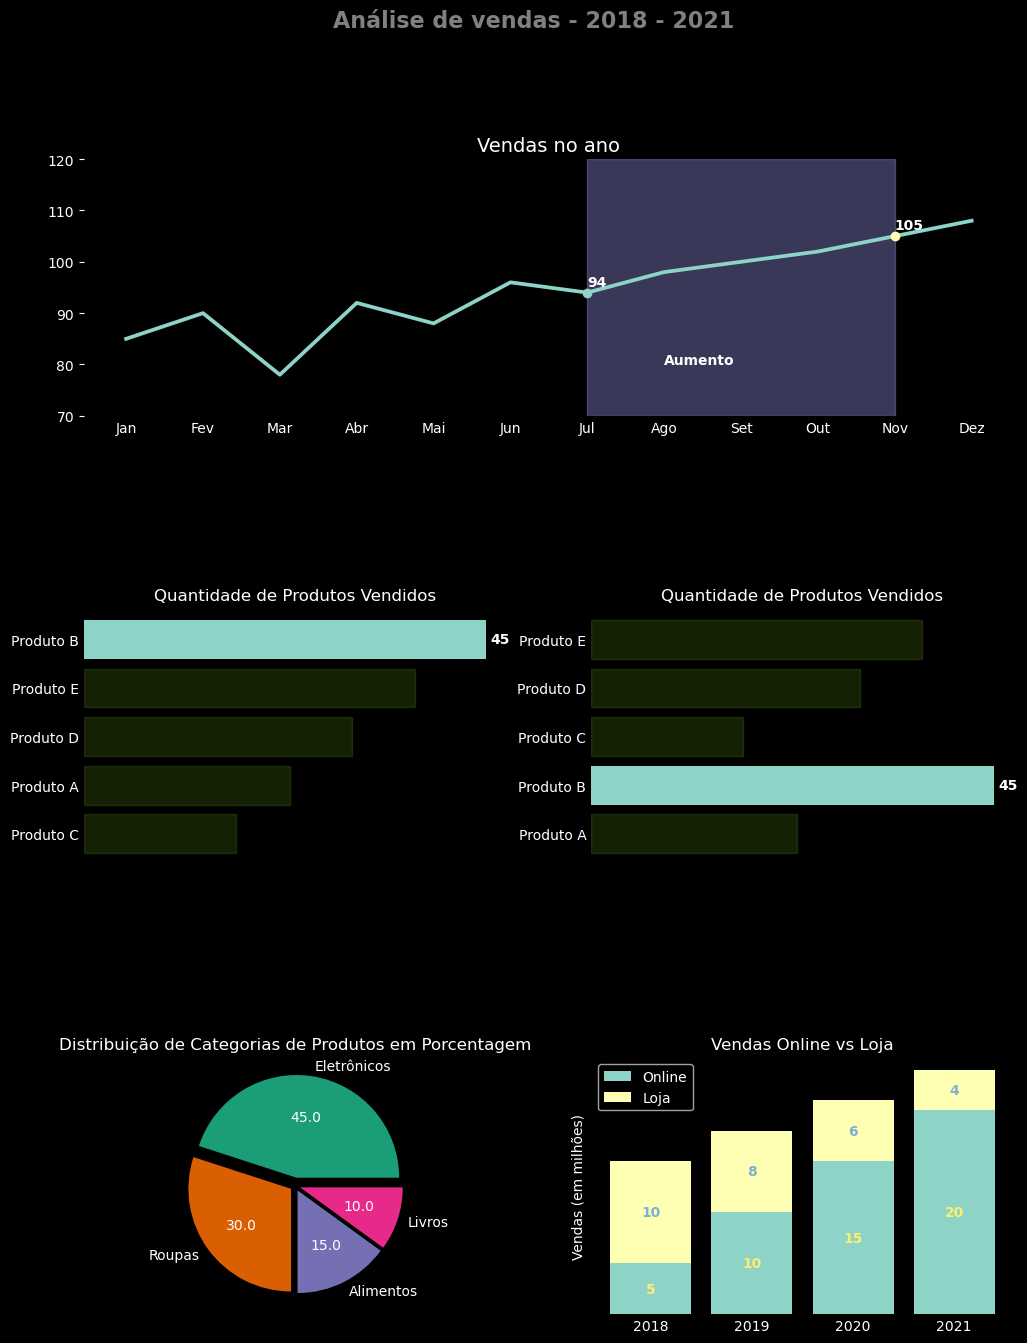

<Figure size 1400x600 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
from cycler import cycler


cores = plt.get_cmap('Dark2').colors

# -------------------------------------------------
mosaico = 'AA;BC;DE'
fig = plt.figure(figsize=(12, 15))
espacamento = {'wspace': .2, 'hspace':.75}
axs = fig.subplot_mosaic(mosaico, gridspec_kw=espacamento)


#cores = plt.get_cmap('Dark2').colors
#ciclo_cores = cycler('color', cores)
#plt.rc('axes', prop_cycle=ciclo_cores)

#plt.style.use('fivethirtyeigth')

# 1 -------------------------------------------------
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
vendas = [85, 90, 78, 92, 88, 96, 94, 98, 100, 102, 105, 108]


axs['A'].plot(meses, vendas, linewidth=2.7)
axs['A'].tick_params(axis='y', )

axs['A'].set_ylim(70, 120)

plt.figure(figsize=(14,6))

# Cor anotações


# Scatter
for posicao in (6, 10):
    axs['A'].scatter(meses[posicao], vendas[posicao], zorder=2)
    axs['A'].annotate(vendas[posicao], xy=(meses[posicao], vendas[posicao]), xytext=(0, 5), textcoords='offset points', weight='bold')


# X
axs['A'].set_xticks(meses)
axs['A'].axvspan(6, 10, alpha=0.5, color=cores[2], zorder=0)


axs['A'].tick_params(axis='x', length=0)
axs['A'].text(7, 80, 'Aumento', fontsize=10, weight='bold')
axs['A'].set_frame_on(False)

axs['A'].set_title('Vendas no ano', fontsize=14)


# 2 . 1 -------------------------------------------------
produtos = ['Produto A', 'Produto B', 'Produto C', 'Produto D', 'Produto E']
quantidades = [23, 45, 17, 30, 37]
dados_ordenados = sorted(zip(quantidades, produtos))  # por quantidade
quantidades_ordenadas = [x[0] for x in dados_ordenados]
produtos_ordenados = [x[1] for x in dados_ordenados]


barras = axs['B'].barh(produtos_ordenados, quantidades_ordenadas)

axs['B'].bar_label(barras, labels=[max(quantidades_ordenadas) if x == max(quantidades_ordenadas) else '' for x in quantidades_ordenadas], padding=3, fontsize=10, fontweight='bold')

# retirando as bordas do gráfico
# plt.box(False)

# retirando o eixo x
axs['B'].set_xticks([])
axs['B'].tick_params(axis='y', length=0)

# destacando a barra do produto com maior quantidade vendida
for i, barra in enumerate(barras):
    if i != quantidades_ordenadas.index(max(quantidades_ordenadas)):
        barras[i].set_color(cores[4])
        barras[i].set_alpha(0.2)

axs['B'].set_frame_on(False)

axs['B'].set_title('Quantidade de Produtos Vendidos')



# 2 . 2 -------------------------------------------------
barras = axs['C'].barh(produtos, quantidades)

axs['C'].bar_label(barras, labels=[max(quantidades) if x == max(quantidades) else '' for x in quantidades], padding=3, fontsize=10, fontweight='bold')

# retirando as bordas do gráfico
# plt.box(False)

# retirando o eixo x
axs['C'].set_xticks([])
axs['C'].tick_params(axis='y', length=0)

axs['C'].set_frame_on(False)



# destacando a barra do produto com maior quantidade vendida
for i, barra in enumerate(barras):
    if i != quantidades.index(max(quantidades)):
        barras[i].set_color(cores[4])
        barras[i].set_alpha(0.2)


axs['C'].set_title('Quantidade de Produtos Vendidos')


# 3 . 1 -------------------------------------------------
categorias = ['Eletrônicos', 'Roupas', 'Alimentos', 'Livros']
quantidades = [45, 30, 15, 10]
destaque = [0.08, 0.05, 0.05, 0.05]  # destacar a primeira fatia


axs['D'].pie(quantidades, labels=categorias, colors=cores, autopct='%.1f', explode=destaque)
axs['D'].set_title('Distribuição de Categorias de Produtos em Porcentagem')



# 3 . 2 -------------------------------------------------
anos = [2018, 2019, 2020, 2021]
vendas_online = [5, 10, 15, 20]
vendas_loja = [10, 8, 6, 4]


barra_online = axs['E'].bar(anos, vendas_online, label='Online')
barra_loja = axs['E'].bar(anos, vendas_loja, bottom=vendas_online, label='Loja')
axs['E'].bar_label(barra_online, labels=vendas_online, fontsize=10, fontweight='bold', label_type='center', color='C9')
axs['E'].bar_label(barra_loja, labels=vendas_loja, fontsize=10, fontweight='bold', label_type='center', color='C4')

# forçar os anos a serem exibidos como inteiros
axs['E'].set_xticks(ticks=anos)
axs['E'].set_yticks([])
axs['E'].tick_params(axis='x', length=0)
axs['E'].set_frame_on(False)

axs['E'].set_ylabel('Vendas (em milhões)')
axs['E'].set_title('Vendas Online vs Loja')
axs['E'].legend()


# -------------------------------------------------------
# Ajustes Finais 

fig.suptitle('Análise de vendas - 2018 - 2021', fontsize=16, fontweight='bold', color='grey')




# -------------------------------------------------------

plt.show()